In [3]:
import ATS_Analysis as ats
import pandas as pd
import numpy as np
import seaborn as sb

%matplotlib inline

In [4]:
patient_list = ['P100', 'P101', 'P102', 'P103', 'P104', 'P105', 'P106', 'P107', 'P108', 'P109', 'P110',
                'P112', 'P113', 'P114', 'P115', 'P116', 'P117','P118', 'P119', 'P120',
                'P121', 'P122']
df = ats.get_data(patient_list, [10, 60, 120, 240])

KeyError: 'Lab_entry'

In [ ]:
df.win.value_counts()

In [28]:
grouped = df.groupby(['win'])

ValueError: operands could not be broadcast together with shapes (13,) (14,) (13,) 

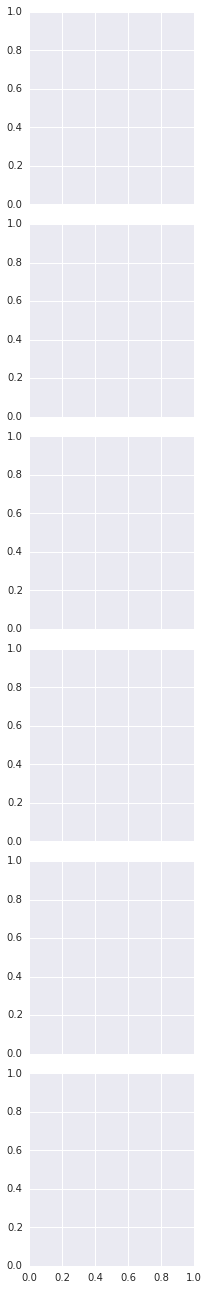

C:\Users\sottilep\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


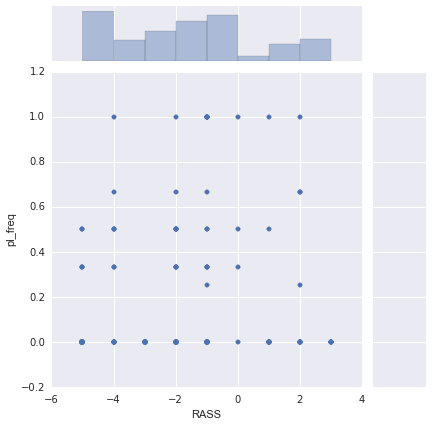

In [67]:
face = sb.FacetGrid(df, row='win', sharey=False)
face.map(sb.jointplot,'RASS', 'pl_freq', kind='scatter')

In [ ]:
grouped.boxplot(column='ie_freq', by='RASS', layout=(6,1), figsize=(10,15))

C:\Users\sottilep\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\tools\plotting.py:3018: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  rot=rot, grid=grid, **kwds)


OrderedDict([((0.10000000000000001, -5.0),
              {'boxes': [<matplotlib.lines.Line2D at 0xfd23d68>],
               'caps': [<matplotlib.lines.Line2D at 0xff86e80>,
               'fliers': [<matplotlib.lines.Line2D at 0xff90e10>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0xff7e470>],
               'whiskers': [<matplotlib.lines.Line2D at 0xfc03a58>,
                <matplotlib.lines.Line2D at 0xff866d8>]}),
             ((0.10000000000000001, -4.0),
              {'boxes': [<matplotlib.lines.Line2D at 0xff955f8>],
               'caps': [<matplotlib.lines.Line2D at 0xff9ac88>,
               'fliers': [<matplotlib.lines.Line2D at 0xffa3860>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0xff9eb00>],
               'whiskers': [<matplotlib.lines.Line2D at 0xff95f28>,
                <matplotlib.lines.Line2D at 0xff9aa58>]}),
             ((0.10000000000000001, -3.0),
              {'boxes': [<matpl

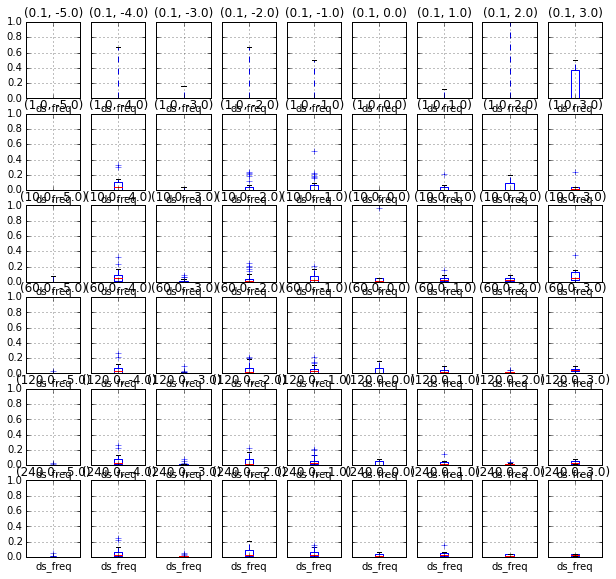

In [18]:
grouped.boxplot(column='ds_freq', layout=(9,9), figsize=(10,15))

In [ ]:
grouped.boxplot(column='pl_freq', by='RASS', layout=(9,9), figsize=(10,15))

In [14]:
grouped = df.groupby(['win', 'RASS'])
grouped[['ds_freq', 'pl_freq', 'ie_freq']].min().unstack(level=0)

C:\Users\sottilep\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\index.py:4281: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.sum(name == np.asarray(self.names)) > 1


ds_freq 
 pl_freq 
 ie_freq 
 
 
 win 
 0.1 
 1.0 
 10.0 
 60.0 
 120.0 
 240.0 
 0.1 
 1.0 
 10.0 
 60.0 
 120.0 
 240.0 
 0.1 
 1.0 
 10.0 
 60.0 
 120.0 
 240.0 
 
 
 RASS 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 -5 
 0 
 0 
 0 
 0.000000 
 0.000000 
 0.000000 
 0 
 0.000000 
 0.000000 
 0.000000 
 0.000000 
 0.000833 
 0 
 0.000000 
 0.002849 
 0.002848 
 0.002844 
 0.003245 
 
 
 -4 
 0 
 0 
 0 
 0.003650 
 0.002891 
 0.000000 
 0 
 0.000000 
 0.000000 
 0.007440 
 0.009863 
 0.009634 
 0 
 0.000000 
 0.003135 
 0.005822 
 0.005839 
 0.005451 
 
 
 -3 
 0 
 0 
 0 
 0.000000 
 0.000758 
 0.000000 
 0 
 0.000000 
 0.000000 
 0.000932 
 0.002785 
 0.004124 
 0 
 0.000000 
 0.002882 
 0.009781 
 0.007454 
 0.013701 
 
 
 -2 
 0 
 0 
 0 
 0.000000 
 0.000000 
 0.001510 
 0 
 0.000000 
 0.003390 
 0.002281 
 0.004904 
 0.005256 
 0 
 0.000000 
 0.000000 
 0.003094 
 0.002669 
 0.003387 
 
 
 -1 
 0 
 0 
 0 
 0.001070 
 0.001497 
 0.001808 
 0 
 0.000000 
 0.000000 
 0.007673 
 0.011416 
 0.026245 
 0 
 0.000000 
 0.002667 
 0.005690 
 0.004792 
 0.008317 
 
 
 0 
 0 
 0 
 0 
 0.000000 
 0.000000 
 0.000000 
 0 
 0.071429 
 0.271429 
 0.241093 
 0.160428 
 0.020202 
 0 
 0.000000 
 0.008721 
 0.011826 
 0.022564 
 0.016836 
 
 
 1 
 0 
 0 
 0 
 0.004532 
 0.002264 
 0.001916 
 0 
 0.000000 
 0.013559 
 0.009063 
 0.006038 
 0.004215 
 0 
 0.000000 
 0.002710 
 0.004500 
 0.005108 
 0.008626 
 
 
 2 
 0 
 0 
 0 
 0.003819 
 0.004030 
 0.002920 
 0 
 0.000000 
 0.020576 
 0.019954 
 0.017923 
 0.019777 
 0 
 0.000000 
 0.000000 
 0.006486 
 0.005107 
 0.005059 
 
 
 3 
 0 
 0 
 0 
 0.005283 
 0.019058 
 0.012638 
 0 
 0.000000 
 0.000000 
 0.023396 
 0.044054 
 0.032811 
 0 
 0.181818 
 0.221831 
 0.329811 
 0.325167 
 0.362017

In [ ]:
grouped[['ds_rolling','tot_rolling', 'ds_freq']].median().unstack(level=0)